In [1]:
import os
import warnings

import numpy as np
import pandas as pd
from himalaya.backend import set_backend, get_backend
import simplstyles
from himalaya.ridge import Ridge
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import config_context
from sklearn.model_selection import ValidationCurveDisplay, LearningCurveDisplay

from compare_variance_residual.simulation.dataset import generate_dataset

In [7]:
set_backend("torch_cuda", on_error='throw')
backend = get_backend()
plt.style.use('nord-light-talk')
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
os.environ["SCIPY_ARRAY_API"] = "1"

In [3]:
feature_space_dimensions = [
    100,  # shared
    100,  # unique 0
    100,  # unique 1
]
scalars = [
    1 / 3, 1 / 3, 1 / 3
]
n_targets = 1
n_samples_train = 10000
n_samples_test = 10000
n_samples = n_samples_train + n_samples_test
noise_scalar = 0.1

In [4]:
cv = 10
alphas = np.logspace(-12, 12, 50)
param_name = "alpha"
param_range = alphas

In [5]:
Xs, Y = generate_dataset(feature_space_dimensions, scalars, n_targets, n_samples, noise_scalar)

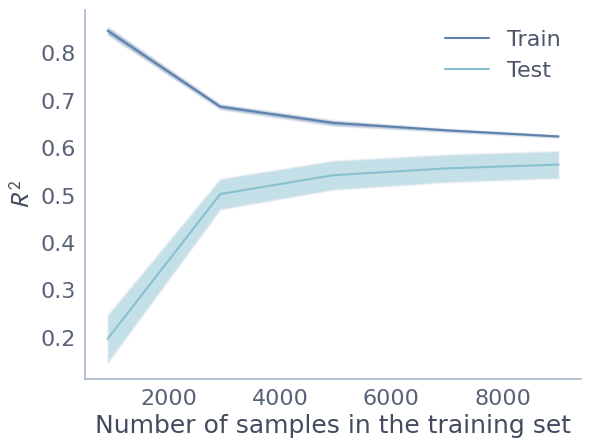

In [7]:
with config_context(array_api_dispatch=True):
    LearningCurveDisplay.from_estimator(
        Ridge(), Xs[0][:n_samples_train], Y[:n_samples_train], cv=cv, score_name=f"$R^2$"
    )

Validation curve

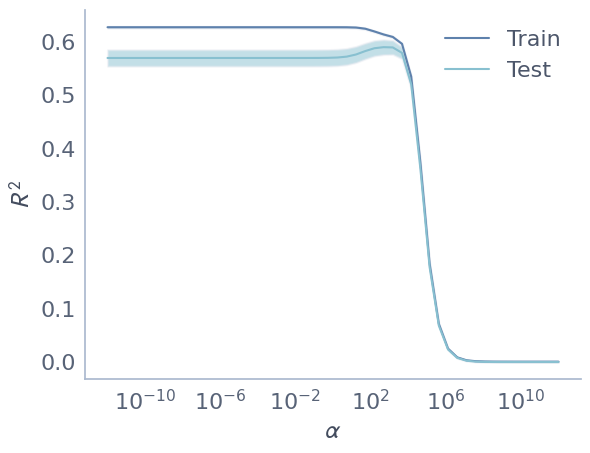

In [9]:
with config_context(array_api_dispatch=True):
    ValidationCurveDisplay.from_estimator(
        Ridge(), Xs[0][:n_samples_train], Y[:n_samples_train], param_name=param_name, param_range=param_range,
        score_name=r"$R^2$", cv=cv
    )
    plt.xlabel(r"$\alpha$")

Plot validation curves across cv range

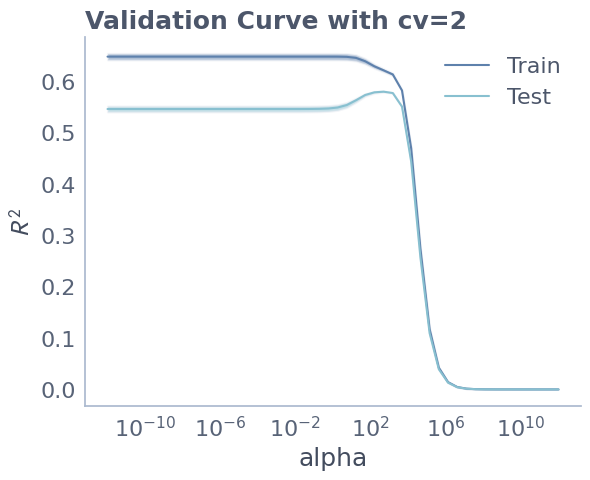

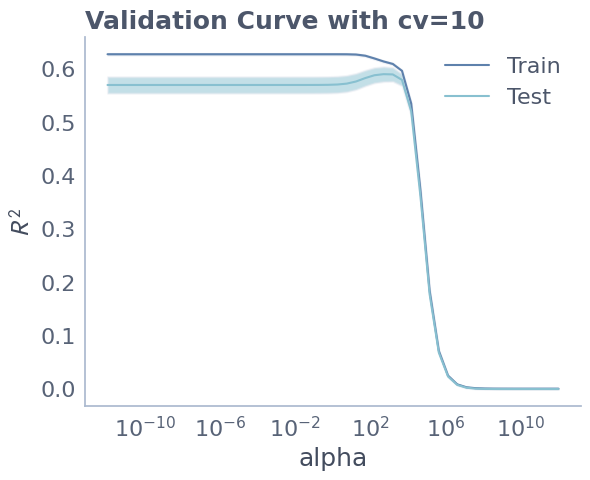

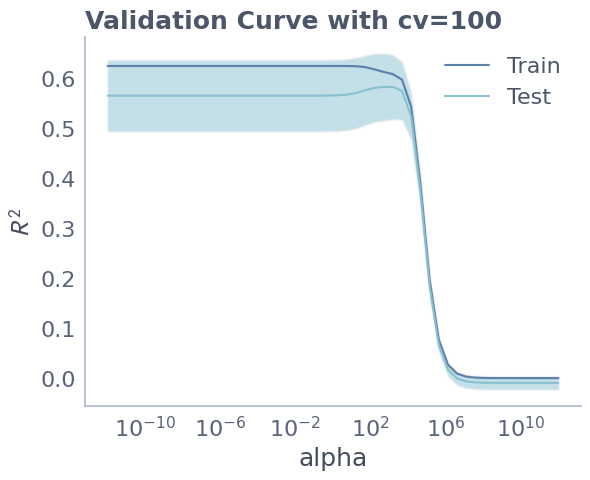

In [10]:
scores = []
cv_range = [2, 10, 100]
for cv in cv_range:
    with config_context(array_api_dispatch=True):
        ValidationCurveDisplay.from_estimator(
            Ridge(), Xs[0][:n_samples_train], Y[:n_samples_train], param_name=param_name, param_range=param_range,
            score_name=r"$R^2$", cv=cv
        )
    plt.title(f"Validation Curve with cv={cv}")
    plt.show()